In [1]:
import numpy as np  
import pandas as pd  
import seaborn as sns;  
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import os
import matplotlib.pyplot as plt
%matplotlib inline


## Data exploration

In [2]:
train = pd.read_csv("./train.csv")
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [3]:
train.describe() 

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [4]:
train.isnull().mean()*100 

Store           0.0
Dept            0.0
Date            0.0
Weekly_Sales    0.0
IsHoliday       0.0
dtype: float64

In [5]:
features = pd.read_csv("./features.csv")
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
features.describe() 

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [7]:
features.isnull().mean()*100 

Store            0.000000
Date             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       50.769231
MarkDown2       64.334554
MarkDown3       55.885226
MarkDown4       57.704518
MarkDown5       50.549451
CPI              7.142857
Unemployment     7.142857
IsHoliday        0.000000
dtype: float64

In [8]:
stores = pd.read_csv("./stores.csv")
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [9]:
store_type=stores.groupby('Type').sum() 
store_type

,Store,Size
Type,,
A,489,3899450
B,312,1720242
C,234,243250


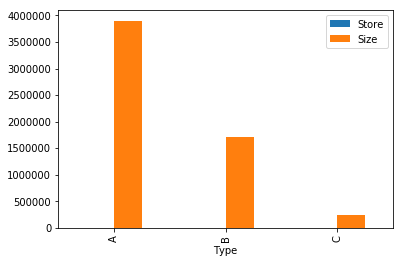

In [10]:
store_type.plot(kind='bar') 

In [11]:
stores.isnull().mean() 

Store    0.0
Type     0.0
Size     0.0
dtype: float64

Merging train, features, stores 

In [12]:
train_features = pd.merge(train, features, on = ['Store', 'Date', 'IsHoliday'], how='left')

In [13]:
train_features.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [14]:
dataset = train_features.merge(stores, how = 'left')
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [15]:
dataset.shape

(421570, 16)

In [16]:
dataset.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


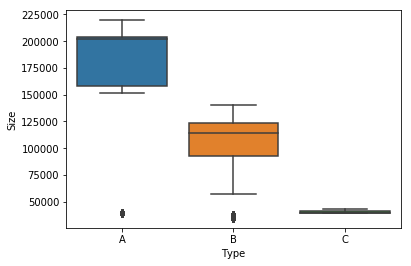

In [17]:
sns.boxplot(x='Type', y='Size', data=dataset)

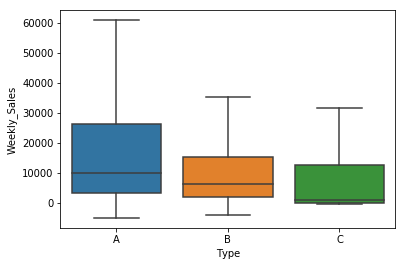

In [18]:
sns.boxplot(x='Type', y='Weekly_Sales', data=dataset, showfliers=False)

Text(0, 0.5, 'Mean Weekly Sales')

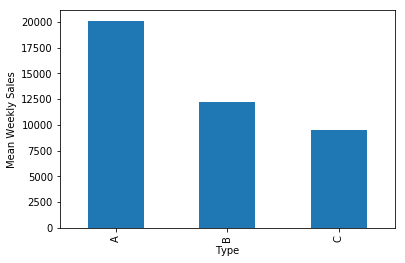

In [19]:
group_by_type = dataset.groupby('Type')
sales_mean = group_by_type.Weekly_Sales.mean()  
sales_mean.plot(kind = 'bar')
plt.ylabel('Mean Weekly Sales')

Text(0, 0.5, 'Mean Weekly Sales / Size')

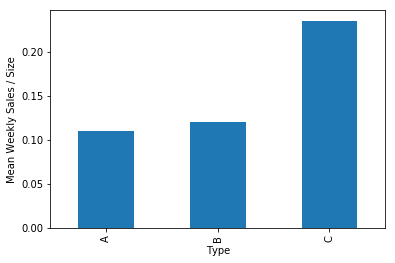

In [20]:
group_by_type = dataset.groupby('Type')
sales_mean_norm = group_by_type.Weekly_Sales.mean() /group_by_type.Size.mean()
sales_mean_norm.plot(kind = 'bar')
plt.ylabel('Mean Weekly Sales / Size')

Data preprocessing

In [21]:
dataset['Date']=pd.to_datetime(dataset['Date'])
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Week'] = dataset['Date'].dt.week
dataset['day'] = dataset['Date'].dt.day
del dataset['Date']

In [22]:
dataset['Type']=LabelEncoder().fit_transform(dataset['Type'])
dataset['IsHoliday']=LabelEncoder().fit_transform(dataset['IsHoliday'])

In [23]:
column_names = dataset.columns
column_names

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Year', 'Month',
       'Week', 'day'],
      dtype='object')

In [24]:
dataset.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,day
0,1,1,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,2010,2,5,5
1,1,1,46039.49,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,0,151315,2010,2,6,12
2,1,1,41595.55,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0,151315,2010,2,7,19
3,1,1,19403.54,0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0,151315,2010,2,8,26
4,1,1,21827.90,0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0,151315,2010,3,9,5


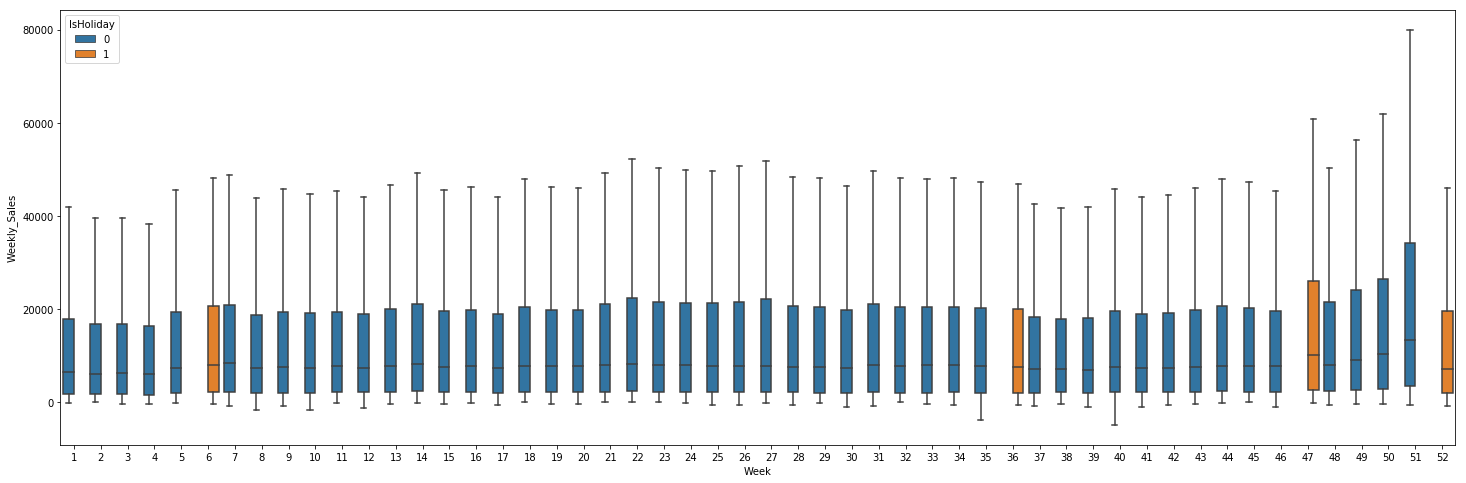

In [25]:
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='Week', y='Weekly_Sales', data=dataset, showfliers=False, hue="IsHoliday")

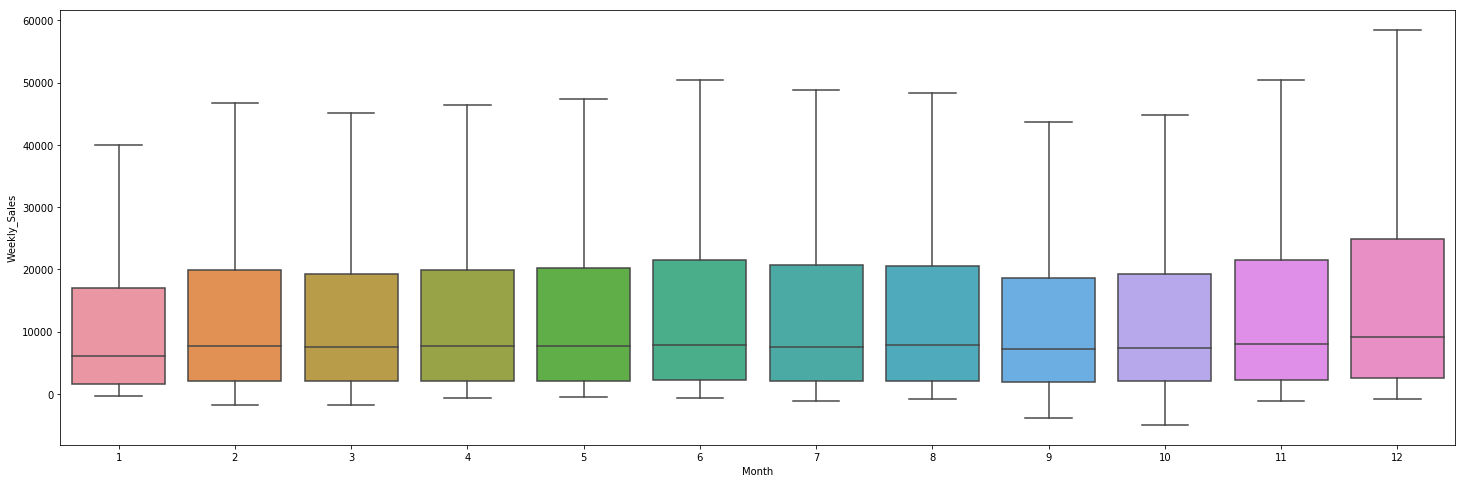

In [26]:
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='Month', y='Weekly_Sales', data=dataset, showfliers=False )

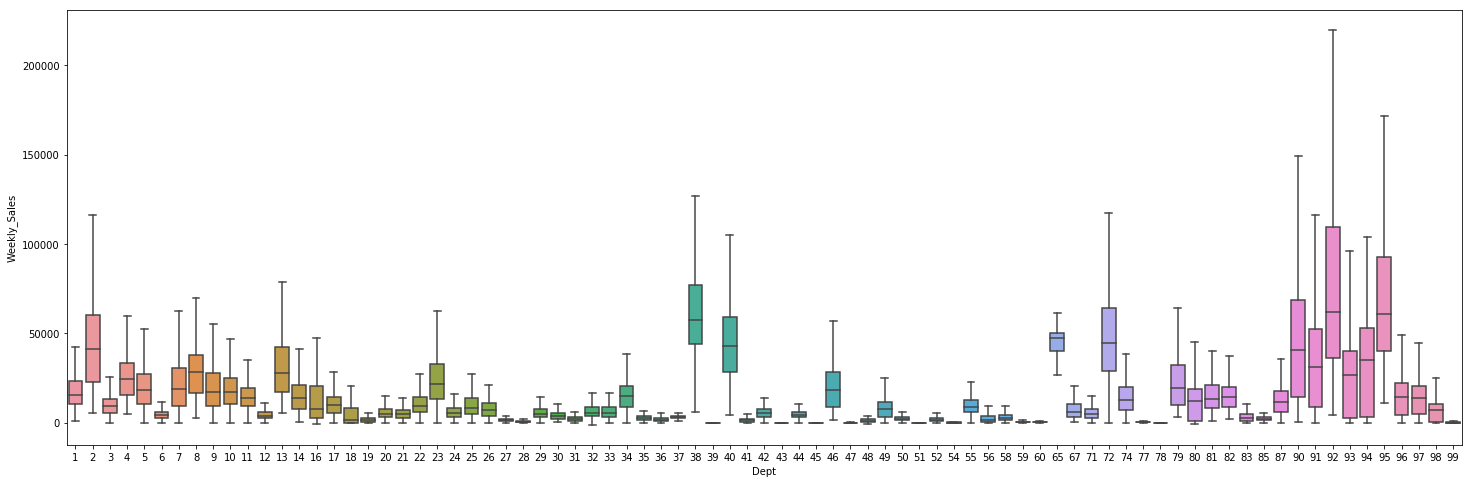

In [27]:
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='Dept', y='Weekly_Sales', data= dataset ,showfliers=False )

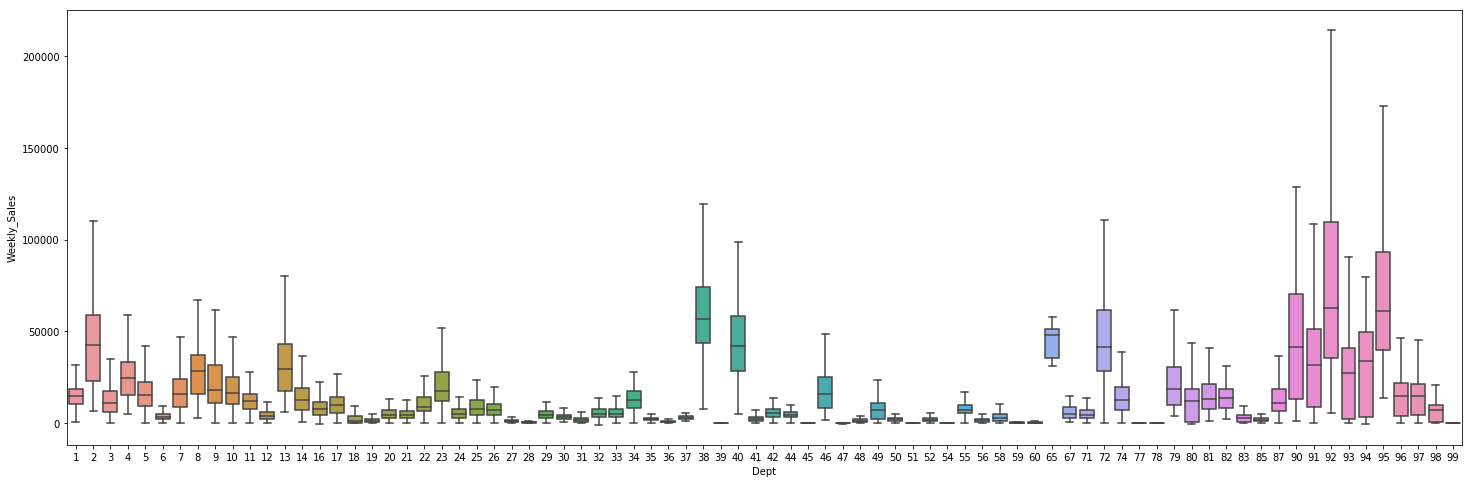

In [28]:
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='Dept', y='Weekly_Sales', data= dataset[dataset.Month==9] ,showfliers=False )

In [29]:
def sns_plot_data(data, columns, ylabel):
    for col in columns:
        sns.scatterplot(data[col],data[ylabel],hue=data['IsHoliday']);
 

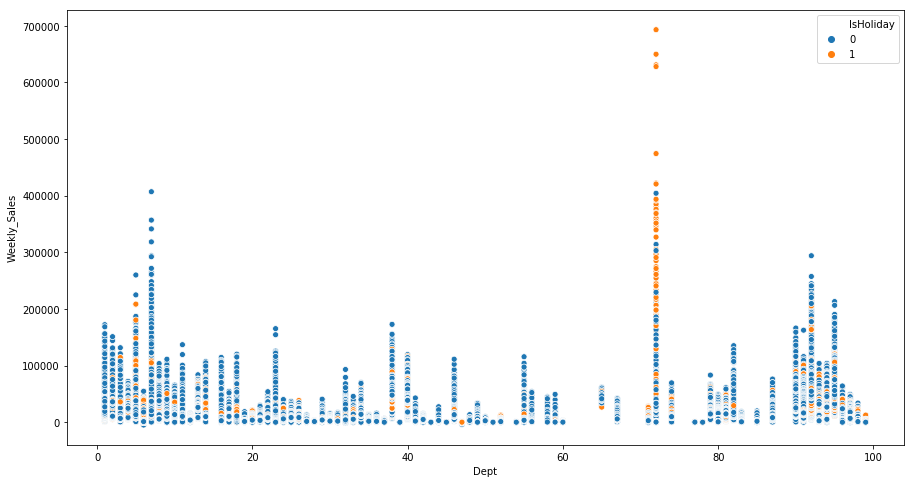

In [30]:
f, ax = plt.subplots(figsize=(15, 8))
sns_plot_data(dataset, ['Dept'], 'Weekly_Sales')

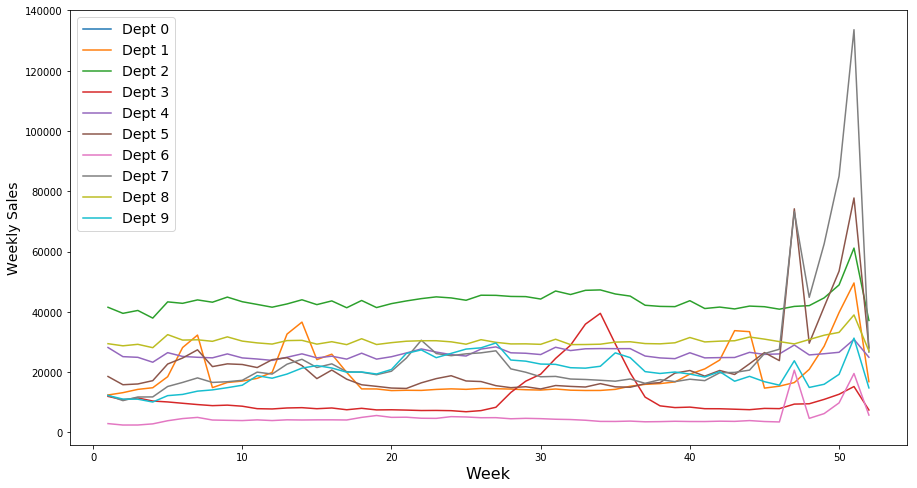

In [31]:
fig, ax = plt.subplots( figsize=(15,8)) 
 
data = dataset.groupby(['Week','Dept']).mean().reset_index() 
data=data[['Dept','Week','Weekly_Sales']]
for i in range(0,10) :
    store=data[data['Dept']==i]
 
    plt.plot(store['Week'], store['Weekly_Sales'], label='Dept %s'%i )
    plt.legend(loc='best',fontsize='14')
    plt.ylabel('Weekly Sales',fontsize='14')
    plt.xlabel('Week',fontsize='16')

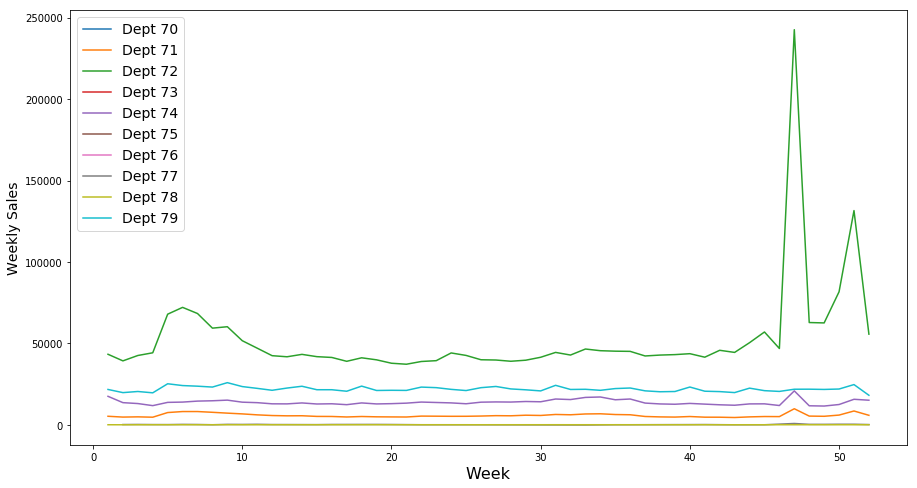

In [32]:
fig, ax = plt.subplots( figsize=(15,8)) 
 
data = dataset.groupby(['Week','Dept']).mean().reset_index() 
data=data[['Dept','Week','Weekly_Sales']]
for i in range(70,80) :
    store=data[data['Dept']==i]
 
    plt.plot(store['Week'], store['Weekly_Sales'], label='Dept %s'%i )
    plt.legend(loc='best',fontsize='14')
    plt.ylabel('Weekly Sales',fontsize='14')
    plt.xlabel('Week',fontsize='16')

In [33]:
def boxplot(data, columns):
    for col in columns:
        plt.figure()
        plt.boxplot(data[col])
        plt.xlabel(col)
        plt.show()
        plt.close()

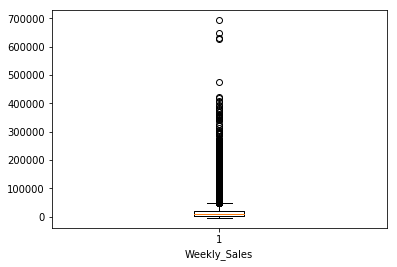

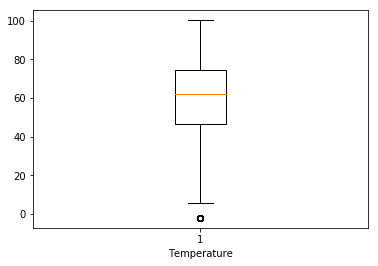

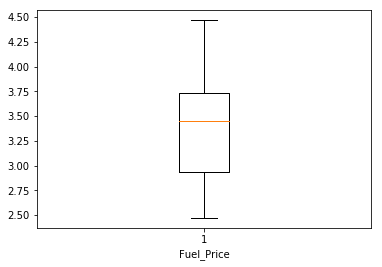

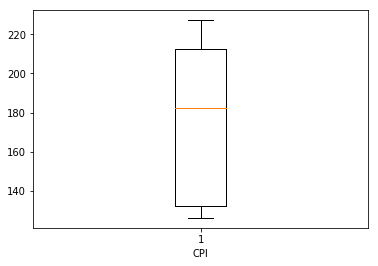

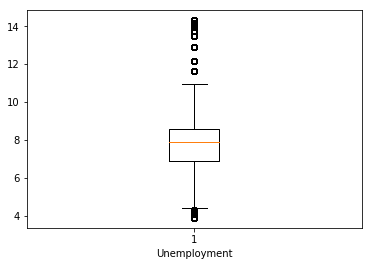

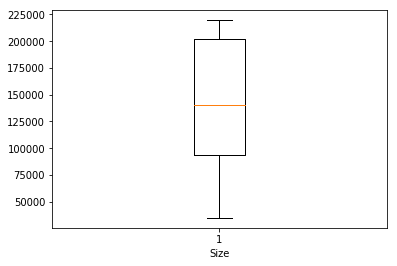

In [34]:
boxplot(dataset, ['Weekly_Sales', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Size'])

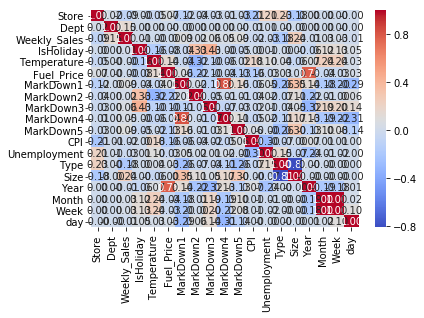

In [35]:
corr = dataset.corr()
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'coolwarm' )

## Training

In [36]:
imputed_data = pd.DataFrame(SimpleImputer().fit_transform(dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']]),
                            columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])
 
dataset=pd.concat([dataset.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1), imputed_data],axis=1)

In [37]:
x_data = dataset.drop('Weekly_Sales',axis=1)
y_data = dataset['Weekly_Sales']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, shuffle=True, random_state=100) 

In [38]:
myLR = LinearRegression()
myLR.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
train_pred= myLR.predict(x_train)
r2_score(y_train,train_pred)
 

0.08730654970318985

In [40]:
myForest=RandomForestRegressor()
myForest.fit(x_train, y_train)

C:\Users\yougui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [41]:
train_pred=myForest.predict(x_train)
r2_score(y_train,train_pred)

0.9949545835720707

In [42]:
test_pred=myForest.predict(x_test)
r2_score(y_test,test_pred)

0.9762883424577602

Feature importance

In [43]:
importances=myForest.feature_importances_  
print(myForest.feature_importances_) 

[5.67239049e-02 6.23116153e-01 1.10076174e-03 9.72983862e-03
 4.23746282e-03 2.65567220e-02 1.11973331e-02 1.49260807e-02
 1.90961419e-01 3.09024886e-04 6.32428338e-03 3.66765581e-02
 7.41660108e-03 1.22070679e-03 1.18504248e-03 5.28128742e-03
 1.96647342e-03 1.07034629e-03]


In [44]:
print(np.argsort(importances)[::-1] )

[ 1  8  0 11  5  7  6  3 12 10 15  4 16 13 14  2 17  9]


In [45]:
x_train.columns
#Feature importance from high to low:
#'Dept','Size','Store','Week', 'CPI','Type','Unemployment', 'Temperature','MarkDown3','day','Month','Fuel_Price','MarkDown4',
#'MarkDown1','MarkDown2','MarkDown5','IsHoliday','Year',

Index(['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Type', 'Size', 'Year', 'Month', 'Week', 'day',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'],
      dtype='object')

In [46]:
new_x_train = x_train.drop(columns=['MarkDown1','MarkDown2','MarkDown5','IsHoliday','Year'])

In [47]:
newForest=RandomForestRegressor()
newForest.fit(new_x_train, y_train)

C:\Users\yougui\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [48]:
train_pred=newForest.predict(new_x_train)
r2_score(y_train,train_pred)

0.9947933227322578

In [49]:
new_x_test = x_test.drop(columns=['MarkDown1','MarkDown2','MarkDown5','IsHoliday','Year'])
test_pred=newForest.predict(new_x_test)
r2_score(y_test,test_pred)

0.9751460145125459

In [50]:
forest = GridSearchCV(newForest, [{'n_estimators': [20,40,80], 'max_depth': [10,25,40]}], \
                           cv=10, iid=False)
 
forest.fit(new_x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=None,
       param_grid=[{'n_estimators': [20, 40, 80], 'max_depth': [10, 25, 40]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [51]:
print(forest.best_params_)

{'max_depth': 25, 'n_estimators': 80}


In [52]:
print(forest.best_score_)

0.9739708478858873


In [53]:
best_forest = RandomForestRegressor(n_estimators = 80, max_depth = 25)
best_forest.fit(new_x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [54]:
test_pred=best_forest.predict(new_x_test)
r2_score(y_test,test_pred)

0.9794208118691919

In [55]:
from sklearn.tree import DecisionTreeRegressor
ada_dt = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=60, learning_rate=1.0,
                        loss='linear', random_state=None)
ada_dt.fit(new_x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=60,
         random_state=None)

In [56]:
test_pred=ada_dt.predict(new_x_test)
r2_score(y_test,test_pred)

0.9782648164177544

In [57]:
#ada_knn = AdaBoostRegressor(base_estimator=KNeighborsRegressor(), n_estimators=50, learning_rate=1.0,
#                        loss='linear', random_state=None)
#ada_knn.fit(x_train,y_train)

In [58]:
#test_pred=ada_knn.predict(x_test)
#r2_score(y_test,test_pred)

In [59]:
#scaler=StandardScaler()
#scaler.fit(x_train)
#x_train_norm=scaler.transform(x_train)
#x_test_norm=scaler.transform(x_test)

In [60]:
#mysvr=SVR()
#mysvr.fit(x_train_norm,y_train)

In [61]:
#train_pred=mysvr.predict(x_train_norm)
#r2_score(y_train,train_pred)

In [62]:
#test_pred=mysvr.predict(x_test_norm)
#r2_score(y_test,test_pred)

## Forecasting

In [63]:
test = pd.read_csv("./test.csv")
features = pd.read_csv("./features.csv")
stores = pd.read_csv("./stores.csv")
test_features = pd.merge(test, features, on = ['Store', 'Date', 'IsHoliday'], how='left')
test_dataset = test_features.merge(stores, how = 'left') 
test_dataset = test_dataset.merge(stores, how='left').merge(features, how='left')

In [64]:
test_dataset.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,A,151315


In [65]:
test_dataset['Date']=pd.to_datetime(test_dataset['Date'])
test_dataset['Year'] = test_dataset['Date'].dt.year
test_dataset['Month'] = test_dataset['Date'].dt.month
test_dataset['Week'] = test_dataset['Date'].dt.week
test_dataset['day'] = test_dataset['Date'].dt.day
date = test_dataset['Date']
del test_dataset['Date']

In [66]:
test_dataset['Type']=LabelEncoder().fit_transform(test_dataset['Type'])
test_dataset['IsHoliday']=LabelEncoder().fit_transform(test_dataset['IsHoliday'])

In [67]:
test_imputed_data = pd.DataFrame(SimpleImputer().fit_transform(test_dataset[['CPI','Unemployment','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']]),
                            columns=['CPI','Unemployment','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])
 
test_dataset =pd.concat([test_dataset.drop(['CPI','Unemployment','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1), test_imputed_data],axis=1)

In [68]:
new_test_dataset = test_dataset.drop(columns=['MarkDown1','MarkDown2','MarkDown5','IsHoliday','Year'])

In [72]:
#predicted_test = myForest.predict(test_dataset)
#predicted_test = newForest.predict(new_test_dataset)
predicted_test = best_forest.predict(new_test_dataset)
#predicted_test = ada_dt.predict(new_test_dataset)

In [73]:
test_forcasting = pd.DataFrame()
test_dataset['Date'] = date
test_forcasting['Id'] = test_dataset['Store'].astype(str) + '_' +  test_dataset['Dept'].astype(str) + '_' +  test_dataset['Date'].astype(str)
test_forcasting['weekly_Sales'] = predicted_test
test_forcasting.round(2).head()

,Id,weekly_Sales
0,1_1_2012-11-02,8287.27
1,1_1_2012-11-09,8142.61
2,1_1_2012-11-16,8358.99
3,1_1_2012-11-23,8270.69
4,1_1_2012-11-30,8309.67


In [74]:
test_forcasting.round(2).to_csv('output.csv',index=False)